In [1]:
prices = [345500, 339500, 339000, 344500, 344500, 330500, 327500, 329000, 329000]

In [2]:
import numpy as np
prices

[345500, 339500, 339000, 344500, 344500, 330500, 327500, 329000, 329000]

In [3]:
sample_mean = np.mean(prices)
sample_std = np.std(prices)

print(sample_mean, sample_std)

336555.55555555556 7100.2521255877655


In [20]:
ratio = (339000 - sample_mean)/sample_std
ratio

0.34427572446831733

In [5]:
# 모평균을 추정해보자.
def estimate_mu(s_mean,s_std):
    distance = 1.96*s_std/np.sqrt(len(prices))
    return s_mean - distance, s_mean + distance

In [6]:
np.mean(estimate_mu(sample_mean, sample_std))

336555.55555555556

In [7]:
# 모분산을 추정해보자 -> 카이스퀘어 분포 이용하면 할 수 있음 -> 근데 일단 이게 중요한게 아님.
#import scipy.stats as stats

In [8]:
# 내가 궁금한건, 모평균과 모분산이 모두 추정되어서 나오는데 새로 들어오는 샘플이 모집단에서 어디에 위치하는 지를 어떻게 말해줄 수 있을까
# 가장 간단한건 샘플이 모집단이라고 가정하고 표현이 가능하다는 것이다.
random_sample = np.random.normal(sample_mean, sample_std,100)

In [9]:
np.mean(random_sample)

336973.7469725755

In [10]:
import matplotlib.pyplot as plt

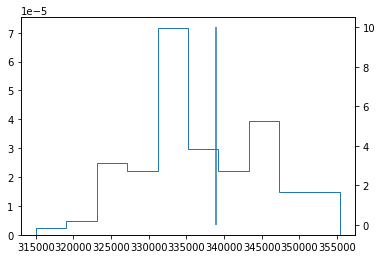

In [19]:
fig, ax1 = plt.subplots()
ax1.hist(random_sample,histtype=u'step', density=True)

ax2 = ax1.twinx()
ax2.vlines(339000, ymin = 0, ymax = 10)

plt.show()

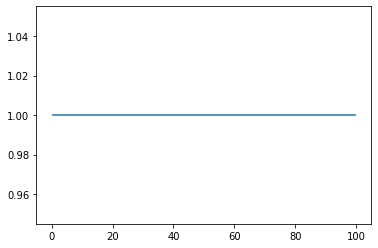

In [14]:
plt.hlines(1,xmin = 0, xmax = 100)

# 중심극한정리
모집단의 분포가 뭐든 상관없이, 표본이 30개 이상이라면 표본평균이 이루는 분포는 정규분포(mu,sigma/sqrt(n))를 이룬다 

In [71]:
np.random.seed(42)
total = np.random.random(1000)
f"모평균:{np.mean(total)}, 모표준편차:{np.std(total)}"

'모평균:0.4902565533201336, 모표준편차:0.291991256731072'

In [78]:
import random
case = 1000
sample_cnt = 300
sample_mean = []
for i in range(case):
    idx = random.sample(range(1000),sample_cnt)
    sample_mean.append(np.mean(total[idx]))

(array([  2.,  14.,  57., 179., 297., 250., 145.,  44.,  11.,   1.]),
 array([0.44205878, 0.4520478 , 0.46203683, 0.47202586, 0.48201489,
        0.49200391, 0.50199294, 0.51198197, 0.52197099, 0.53196002,
        0.54194905]),
 <BarContainer object of 10 artists>)

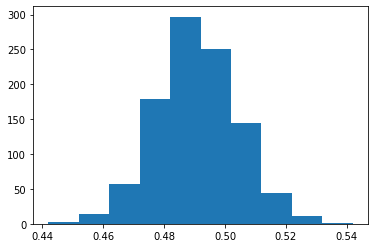

In [79]:
plt.hist(sample_mean)

In [80]:
np.mean(sample_mean), np.std(sample_mean)

(0.4909154852325457, 0.013404766152541922)

In [81]:
np.mean(total), np.std(total)/np.sqrt(sample_cnt)

(0.4902565533201336, 0.016858123067470154)

# MLE방식으로 파라미터 구하기
데이터들이 주어질 때, 해당 데이터셋의 가능성을 가장 높이는 파라미터를 찾는 방식이다.

근데 생각해보니까, 샘플들의 표본평균과 표본분산을 구해서 우리가 predefined한 값과의 차이만큼 변동시켜주면 되서.. 이것도 굳이 할 필요가 없어졌다.

사실상 MLE방식은 우리에게 주어진 샘플을 보고-> 얘네가 무슨 분포겠구나 -> 분포에는 파라미터가 있지 -> 모집단이 가지는 분포의 파라미터는 뭘까 -> 가진거라곤 샘플밖에 없으니까 얘네를 통해 맞춰보자 -> 근데 어떻게 추정할 수 있을까? -> 가지고 있는 데이터들의 가능도를 최대로 만들어주는 (최대/최소 문제) 문제를 사용해보자 -> concave형태로 문제풀이가 가능하겠구나(두번미분하니까 0보다 작았음) -> 미분해서 0인 지점을 수학적으로 표현하자

-> MLE는 Determnistic한 방식으로 모집단의 파라미터를 추정한다.

In [84]:
binary_sample = []
for _ in range(100):
    binary_sample.append(random.choice(range(2)))

In [87]:
np.mean(binary_sample)

0.55

In [95]:
random.choices(range(2), weights = [0.5, 0.5])

[1]